In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
temp_df= pd.read_csv('IMDB Dataset.csv')

In [3]:
df = temp_df.iloc[:10000] # system couldnt handle more :( #
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [5]:
df.sentiment.value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

<BarContainer object of 2 artists>

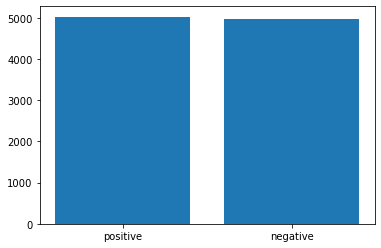

In [6]:
import matplotlib.pyplot as plt
plt.bar(df['sentiment'].value_counts().index,df['sentiment'].value_counts())

In [7]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [8]:
df.duplicated().sum()

17

In [9]:
df.drop_duplicates(inplace=True)

<ipython-input-9-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


Basic Preprocessing:

In [10]:
import re
def remove_tags(raw_text):
    clean= re.sub(re.compile('<.*?>'), '', raw_text)
    return clean


In [11]:
df['review'] = df['review'].apply(remove_tags)

<ipython-input-11-00e93c2a3043>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_tags)


In [12]:
df['review'] = df['review'].str.lower()

<ipython-input-12-92c61e6b1a16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.lower()


In [13]:
df.review

0       one of the other reviewers has mentioned that ...
1       a wonderful little production. the filming tec...
2       i thought this was a wonderful way to spend ti...
3       basically there's a family where a little boy ...
4       petter mattei's "love in the time of money" is...
                              ...                        
9995    fun, entertaining movie about wwii german spy ...
9996    give me a break. how can anyone say that this ...
9997    this movie is a bad movie. but after watching ...
9998    this is a movie that was probably made to ente...
9999    smashing film about film-making. shows the int...
Name: review, Length: 9983, dtype: object

In [14]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

<ipython-input-14-9f68b5950da1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))


In [15]:
df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive
...,...,...
9995,"fun, entertaining movie wwii german spy (julie...",positive
9996,"give break. anyone say ""good hockey movie""? kn...",negative
9997,movie bad movie. watching endless series bad h...,negative
9998,"movie probably made entertain middle school, e...",negative


In [16]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

y

array([1, 1, 1, ..., 0, 0, 1])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)


In [19]:
X_train.shape

(7986, 1)

## BagofWords Models:

***Naive-Bayes Model with BoW***

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [21]:
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

In [22]:
X_train_bow.shape

(7986, 48282)

In [23]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()

mb.fit(X_train_bow,y_train)

MultinomialNB()

In [24]:
y_pred = mb.predict(X_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.8497746619929895

In [25]:
cv = CountVectorizer(ngram_range=(1,2),max_features=50000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

mb = MultinomialNB()

mb.fit(X_train_bow,y_train)
y_pred = mb.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8753129694541812

***Random Forest Model with BoW:***

In [26]:
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8437656484727091

In [27]:
cv = CountVectorizer(ngram_range=(1,2),max_features=50000)
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8547821732598898

## TFIDF Models:

***Naive-Bayes Model with TFIDF***

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=50000)
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review'])

mb = MultinomialNB()

mb.fit(X_train_tfidf,y_train)
y_pred = mb.predict(X_test_tfidf)
accuracy_score(y_test,y_pred)

0.8823234852278418

***Random Forest Model with TFIDF***

In [31]:
tfidf = TfidfVectorizer(max_features=10000,ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review'])

rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

accuracy_score(y_test,y_pred)

0.8477716574862293

## *CONCLUSION:*
GETTING AN ACCURACY OF ~88.23% WITH NAIVE BAYES (MULTINOMIAL NB) MODEL WITH TFIDF VECTORIZER (USING ONLY 20% OF THE DATASET - 10000/50000).